### Zadanie domowe 2

Proszę skonstruować klasyfikator oparty na regresji logistycznej dla danych dotyczących jakości odbitego sygnału radarowego przez jonosferę, gdzie dla każdego przykładu jakość odbitego sygnału jest opisana atrybutem nominalnym przyjmującym jedną z dwóch możliwych wartości: 'b'  (ang. bad) i 'g' (ang. good). Model powinien dokonywać predykcji jakości odbitego sygnału radarowego na podstawie wartości wszystkich 34 atrybutów ciągłych. 

Dokładny opis danych jest dostępny na stronie https://archive.ics.uci.edu/ml/datasets/ionosphere, zaś pliki z danymi są dostępne pod adresem https://archive.ics.uci.edu/ml/machine-learning-databases/ionosphere/. Dane znajdują się w pliku <a href="https://archive.ics.uci.edu/ml/machine-learning-databases/ionosphere/ionosphere.data">ionosphere.data</a> a dokładne informacje o tym zbiorze danych są zapisane w pliku <a href="https://archive.ics.uci.edu/ml/machine-learning-databases/ionosphere/ionosphere.names">ionosphere.names</a>.

Do konstrukcji klasyfikatora należy użyć zbioru treningowego a do jego oceny zbioru testowego. Zbiory te powinny być utworzone przez podzielenie zbioru danych na części odpowiednio zawierające 80% i 20% wszystkich przykładów. Części te powinny charakteryzować się takim samym stosunkiem liczby obserwacji z klasy 'b' do liczby obserwacji z klasy 'g' co pełny zbiór danych. 

Rozwiązaniem powinien być plik .ipynb z kodem w Pythonie wczytującym dane, trenującym opisany klasyfikator i oceniającym jego możliwości predykcyjne. Ocena możliwości predykcyjnych skonstruowanego klasyfikatora powinna składać się z macierzy konfuzji (zwaną także macierzą błędów lub tablicą pomyłek, ang. *confusion matrix*), dokładności (ang. *accuracy score*), krzywej ROC oraz pola powierzchni AUC pod krzywą ROC obliczonych na podstawie danych testowych.  

##### Dodatkowe wskazówki:

1) Dane można wczytać z pliku za pomocą <a href="https://numpy.org/doc/stable/reference/generated/numpy.genfromtxt.html">numpy.genfromtxt</a>.

2) Klasy 'b' (bad) i 'g' (good) należy zastąpić wartościami liczbowymi odpowiednio 0 i 1. 


In [66]:
import numpy as np
import matplotlib.pyplot as plt

from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, accuracy_score, roc_curve, auc, classification_report, roc_auc_score
from sklearn import metrics 
import pandas as pd
import seaborn as sb

%matplotlib inline

In [67]:
data = np.genfromtxt('ionosphere.data', delimiter=',', dtype='str')

# Zamiana klas 'b' na 0 i 'g' na 1
data[:, -1] = np.where(data[:, -1] == 'b', 0, 1)

# Podział na cechy i etykiety
X = data[:, :-1].astype(float)
y = data[:, -1].astype(int)

In [68]:

X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,stratify=y)

In [69]:
model = LogisticRegression()

model.fit(X_train, y_train)

y_pre_train_sk = model.predict(X_train)
y_pre_test_sk = model.predict(X_test)

In [70]:
# Macierz konfuzji
conf_matrix = confusion_matrix(y_test, y_pre_test_sk)
print("Confusion Matrix:")
print(conf_matrix)

# Dokładność
accuracy = accuracy_score(y_test, y_pre_test_sk)
print("\nAccuracy:", accuracy)

Confusion Matrix:
[[18  7]
 [ 2 44]]

Accuracy: 0.8732394366197183


In [71]:
print(classification_report(y_test, y_pre_test_sk))

              precision    recall  f1-score   support

           0       0.90      0.72      0.80        25
           1       0.86      0.96      0.91        46

    accuracy                           0.87        71
   macro avg       0.88      0.84      0.85        71
weighted avg       0.88      0.87      0.87        71



In [73]:
y_test_pred_prob = model.predict_proba(X_test)[:,1]
fpr, tpr, _ = roc_curve(y_test, y_test_pred_prob)
auc = metrics.roc_auc_score(y_test, y_test_pred_prob)

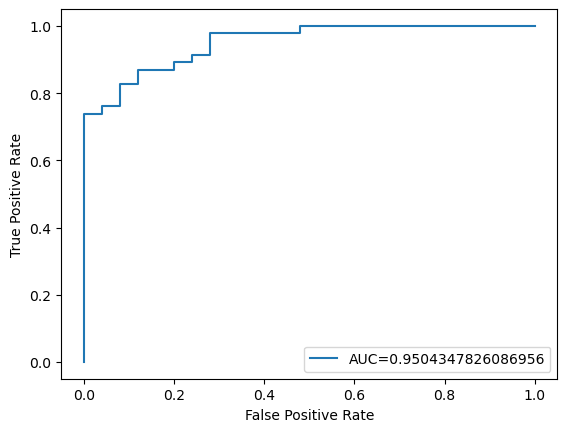

In [74]:
# Plot ROC curve
plt.plot(fpr,tpr,label="AUC="+str(auc))
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.legend()
plt.show()

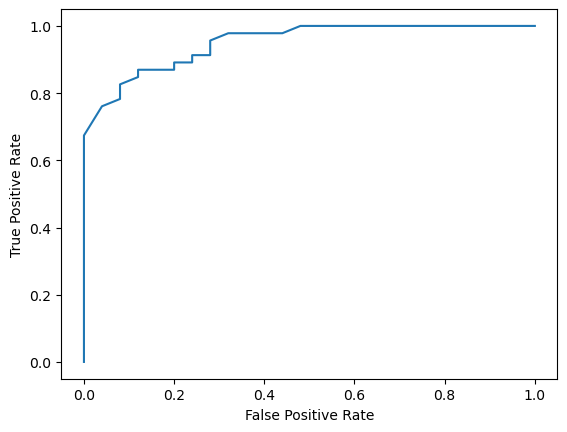

In [75]:
thresholds = np.linspace(0,1,100)
fpr = []
tpr = []
for thr in thresholds:
    y_pre_test = 1 * (y_test_pred_prob > thr)
    tn, fp, fn, tp = confusion_matrix(y_test, y_pre_test).ravel()
    fpr.append(fp/(fp+tn))
    tpr.append(tp/(fn+tp))
plt.plot(fpr,tpr)
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

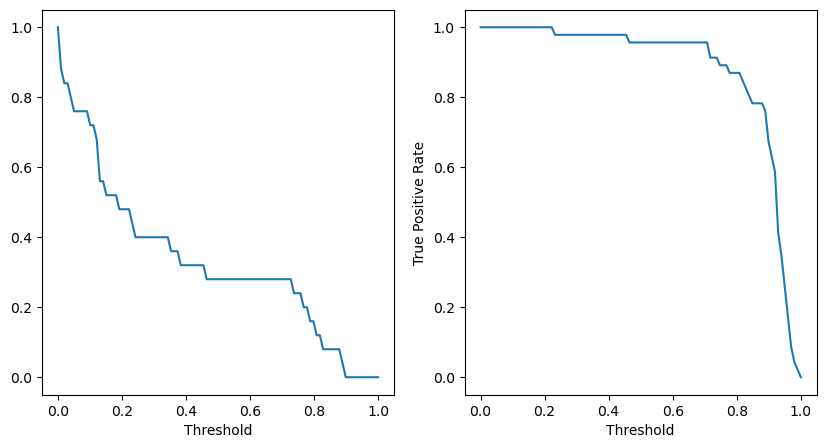

In [76]:
fig = plt.figure(figsize=(10,5))

plt.subplot(1, 2, 1)
plt.plot(thresholds,fpr)
plt.xlabel("Threshold")

plt.subplot(1, 2, 2)
plt.plot(thresholds,tpr)
plt.xlabel("Threshold")
plt.ylabel('True Positive Rate')

plt.show()